In [1]:
import numpy as np  # NumPy library for linear algebra operations and more
import pandas as pd  # Pandas library for working with tabular data
import matplotlib.pyplot as plt  # Matplotlib library for visualization
from matplotlib.colors import ListedColormap  # Matplotlib function to generate color maps

from sklearn.datasets import make_moons, make_circles, make_classification  # Generated datasets

# Generate synthetic datasets for classification tasks
# make_moons: Generate two interleaving half circles
# make_circles: Generate a large circle containing a smaller circle in 2D
# make_classification: Generate a random n-class classification problem


In [2]:
plt.style.use('dark_background')

In [3]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    """Visualization of bivariate data for classification
        Input variables:
        ===========
        ax: individual cell of the figure object
        ds: dataset containing features X and target labels y
        name: name of the graph
        marker: type of marker - by default just circles
        colors: colors to be used for coloring different classes - by default Red and Blue
        alpha: marker transparency
        s: marker size (~ radius square)
        facecolor:
    """
    X, y = ds  # unpack features and target labels into separate variables
    cm_bright = ListedColormap(colors)  # create a color map from our colors
    ax.set_title(name, fontsize=30)  # set the title of the plot

    if facecolor:  # if the variable is set, plot a scatter plot of features using marker parameters
        ax.scatter(X[:, 0], X[:, 1],
                   marker=marker, c=y,
                   cmap=cm_bright, s=s,
                   alpha=alpha)
    else:  # otherwise, plot a scatter plot without face color
        ax.scatter(X[:, 0], X[:, 1],
                   marker=marker, c=y,
                   cmap=cm_bright, s=s,
                   facecolor='None',
                   alpha=alpha)

    # add some beauty and neatness
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5  # fix minimum and maximum values horizontally
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  # fix minimum and maximum values vertically
    ax.grid(True)
    ax.set_xlim(x_min, x_max)


In [4]:
def make_binary_clf(N, method = 'line',
                    noises = 0.15,
                    random_state = 42):
    """Creating a synthetic dataset
    for binary classification
    Input variables:
    ===========
    N: number of points
    method: dataset type
    noises: coefficient ~ noise strength
    random_state: fixed random number cid (for repeatability)
    """
    # фиксируем случайный seed
    if random_state: rng = np.random.RandomState(seed = random_state)

    if method == 'line' or method is None:
        # If the method chosen is 'line' or none is specified,
        # we generate a dataset using the make_classification function.
        # This will create linearly separable data.
        X, y = make_classification(n_samples=N,  # number of points
                                   n_features=2,  # number of features
                                   n_redundant=0,  # number of redundant features
                                   n_informative=2,  # number of informative features
                                   n_clusters_per_class=1,  # number of clusters per class
                                   class_sep=2,  # class separation
                                   random_state=random_state  # fixed random seed
                                   )
        X += np.random.randn(*X.shape) * noises  # add random noise to the features

    elif method == 'moons':
        # If the method chosen is 'moons',
        # we generate a dataset using the make_moons function.
        # This will create moon-shaped data.
        X, y = make_moons(n_samples=N,  # number of points
                          noise=noises,  # noise level
                          random_state=random_state  # fixed random seed
                          )

    elif method == 'circles':
        # If the method chosen is 'circles',
        # we generate a dataset using the make_circles function.
        # This will create data in the form of concentric circles.
        X, y = make_circles(n_samples=N,  # number of points
                            noise=noises,  # noise level
                            factor=0.5,  # ratio of inner and outer circle radius
                            random_state=random_state  # fixed random seed
                            )

    return X, y


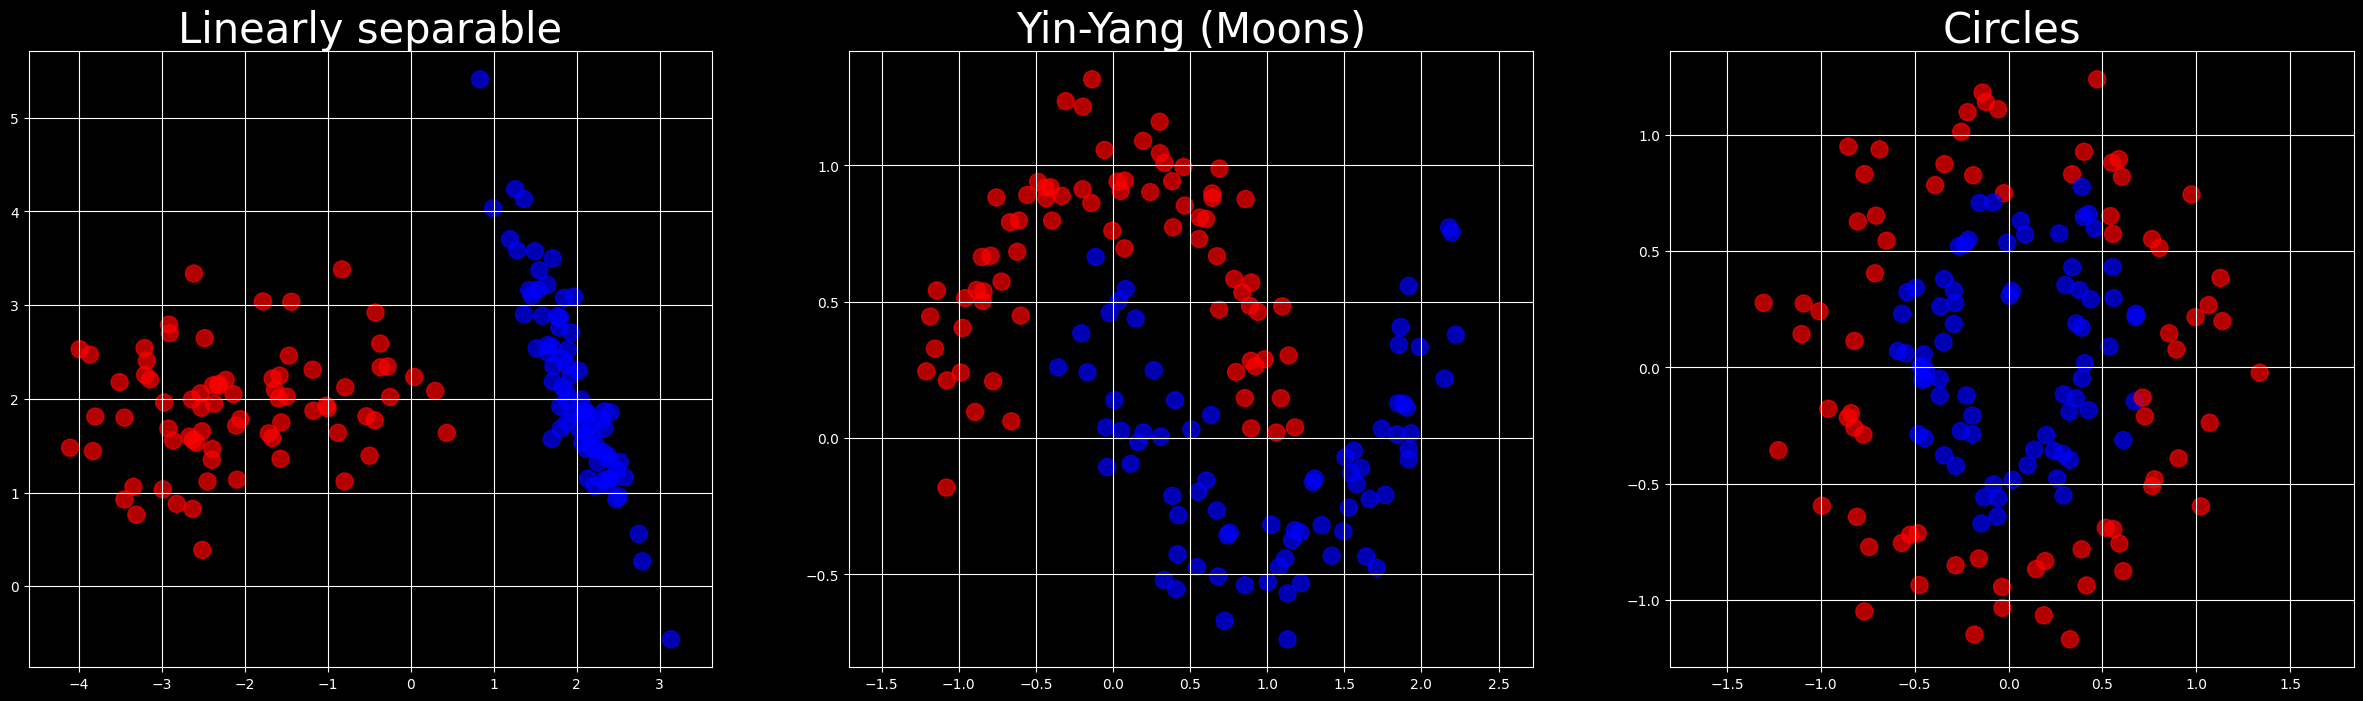

In [5]:
#@title data { run: “auto” }
N = 150 #@param {type:"slider", min:50, max:250, step:25}
noises = 0.15  #@param {type:"slider", min:0, max:1, step:0.05}


fig=plt.figure(figsize=(30,8))

ax = plt.subplot(1, 3, 1)
plot_data(ax,make_binary_clf(N,method = 'line',
                             noises = noises),
          'Linearly separable')
ax = plt.subplot(1, 3, 2)
plot_data(ax,make_binary_clf(N,method = 'moons',
                             noises = noises),
          'Yin-Yang (Moons)')
ax = plt.subplot(1, 3, 3)
plot_data(ax, make_binary_clf(N,method = 'circles',
                              noises = noises),
          'Circles')

In [6]:
N = 150
X,y = make_binary_clf(N,method = 'line', noises=0.05, )

X.shape

(150, 2)

In [7]:
X

array([[ 1.71179071,  2.50031423],
       [ 1.4055793 ,  3.50489335],
       [-2.41614767,  2.20137839],
       [-3.94652927,  1.39615258],
       [-3.68301377,  1.50459445],
       [ 1.54387153,  3.08500076],
       [ 2.51199994,  1.0237272 ],
       [-2.68839761,  1.0349245 ],
       [ 2.42096277,  1.11473157],
       [ 1.24220784,  4.14997419],
       [ 1.76287113,  2.67711568],
       [ 1.14257665,  4.06602858],
       [ 0.53684139,  5.43573974],
       [ 1.11937946,  4.08746969],
       [-1.48639672,  2.40295996],
       [ 1.63019488,  2.85119195],
       [-1.06840915,  1.69859227],
       [ 1.44446862,  3.33759528],
       [-0.71603377,  2.6065073 ],
       [ 2.24057396,  0.94796806],
       [ 2.42039904,  1.08963245],
       [ 1.77794564,  2.49674453],
       [ 1.89419358,  2.36749212],
       [ 2.19384341,  1.58610141],
       [ 2.67228511,  0.42809901],
       [-2.39787778,  0.27564411],
       [-3.84123242,  2.52867471],
       [-2.26174565,  1.26398439],
       [ 2.08772073,

Let's calculate the distance through the functions

With the possibility of selecting the metric

In [8]:
def distance(X1, X2, metric = 'euclidean', p = 2):
    """Distance estimation
    Input variables:
    ===========
    X1: first vector / matrix of vectors
    X2: second vector / matrix of vectors
    metric: type of distance metric
    p: degree for the Minkowski Metric
    """
    # here it's like “textbook formulae”.
    if metric == 'euclidean':
        # Euclidean distance is the root of the sum of the squares of the differences
        dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
    if metric == 'cityblock':
        # Manhattan distance is the sum of the moduli of the differences
        dist = np.sum(np.abs(X1 - X2).T,axis=0)
    if metric == 'Chebyshev':
        # Chebyshev distance is the maximum of the moduli of the differences
        dist = np.max(np.abs(X1 - X2).T,axis=0)
    if metric == 'Minkowski':
        # the Minkowski distance is the pth degree root of the sum of differences in degree p
        dist = np.power(np.sum(np.power(np.abs(X1 - X2),p).T,axis=0),1/p)
    return dist # returns 1 number if we are looking for the distance between vectors
    # and several numbers if there are several vectors

Let's run some tests, the function works with both vectors and matrices of equal dimension.

In [9]:
X[:5]

array([[ 1.71179071,  2.50031423],
       [ 1.4055793 ,  3.50489335],
       [-2.41614767,  2.20137839],
       [-3.94652927,  1.39615258],
       [-3.68301377,  1.50459445]])

In [10]:
X[10:15]

array([[ 1.76287113,  2.67711568],
       [ 1.14257665,  4.06602858],
       [ 0.53684139,  5.43573974],
       [ 1.11937946,  4.08746969],
       [-1.48639672,  2.40295996]])

In [11]:
print(distance(X[0], X[1],metric = 'cityblock')) # distance between two vectors (0th and 1st point)
print(distance(X[:5], X[10:15])) # distance between two groups of 5 vectors (0 through 4, and 10 through 14)
print(distance(X[0], X[10:15])) # distance between a vector and a group of 5 vectors (0th vector, and 10 through 14)

1.310790528053447
[0.18403249 0.61971214 4.379639   5.73642913 2.37322293]
[0.18403249 1.66597301 3.16183946 1.69411143 3.19966884]


In [12]:
metrics = ['euclidean','cityblock','Chebyshev','Minkowski']

Let's try all of them and check to determine the distance between two vectors (0-th and 1-th point)

In [13]:
for metric in metrics:
    print(distance(X[0], X[1],metric = metric, p = 10))

1.050211706708335
1.310790528053447
1.0045791158082147
1.0045798114009907


Initialization of k-centers

Before clustering, we need to initialize the cluster centers.
For this purpose, let's select random indexes among the available ones in the dataset

In [15]:
def init_centroids(X, n_clusters, random_state = 42):
    """Initialize centroids.
    Input variables:
    ===========
    X: features
    n_clusters: expected number of clusters
    random_state: fixed random number cid (for repeatability)
    """
    if random_state: rng = np.random.seed(random_state) # fix random seed
    # select n_clusters of random indices from the range from 0 to the number of points in the data
    centroid_idxs = np.random.randint(0, X.shape[0], size = n_clusters)
    return X[centroid_idxs,:] # centers of clusters - points with selected indices

Let's see how it works for two clusters

In [16]:
n_clusters = 2
centroids = init_centroids(X, n_clusters)
print(centroids)

[[-2.51293823  2.320391  ]
 [ 1.98655521  2.36707007]]


Let's perform the first clustering. To do this, take each centroid and calculate the distance from it to all records of the dataset.
The value indices for each cluster will be chosen as indices of minimum distances to the corresponding centroid.
Thus, the zero cluster will include those points of the dataset where the distance to the zero centroid is less than to the first centroid.

In [17]:
def predict(X, n_clusters, centroids, metric = 'euclidean', p = 2):
    """Cluster prediction
    Input variables:
    ===========
    X: signs
    n_clusters: expected number of clusters
    centroids: current cluster centers
    metric: type of distance metric
    p: degree for the Minkowski Metric
    """
    # fill the distance matrix with zeros. the dimension of the matrix is number of points per number of clusters
    distances = np.zeros((X.shape[0], n_clusters))
    # peribrate each centroid
    for i, centr in enumerate(centroids):
        distances[:,i] = distance(centr,X, metric, p)#calculate the distance from the center to all points
        # use the previously written distance search function
    cluster_label = np.argmin(distances,axis = 1) # find the nearest center for each point
    return cluster_label, distances # return cluster labels and distance matrix

let's see how the clustering results are distributed

To do this, let's write a function (not to repeat)

In [18]:
def plot_cluster(X,centroids, cluster_label, centroids_label, old_centroids = None, old_centroids_label = None):
    """Cluster visualization
    Input variables:
    ===========
    X: attributes
    centroids: current cluster centers
    cluster_label: cluster labels for features
    centroids_label: labels for current cluster centers
    old_centroids: previous cluster centers
    old_centroids_label: labels for previous cluster centers
    """
    fig = plt.figure(figsize=(10,5)) # Create a canvas
    # Visualize our features
    plt.scatter(X[:, 0], X[:, 1],
                c = cluster_label, cmap = 'bwr',
                s=100,alpha = 0.6)
    # Visualize the current cluster centers. Like points, but bigger
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c = centroids_label, cmap = 'bwr',
                s=400, edgecolors = 'k')

    if old_centroids is not None: # if we want to visualize the previous centers of clusters
        # they will be smaller than the current centers, but larger than the “row points”.
        plt.scatter(old_centroids[:, 0], old_centroids[:, 1],
            c = old_centroids_label, cmap = 'bwr',
            s=200, edgecolors = 'k')

    plt.xticks([])
    plt.yticks([])


* Generate initial centroids
* Estimate cluster labels for the initial centroids
* Visualize the result


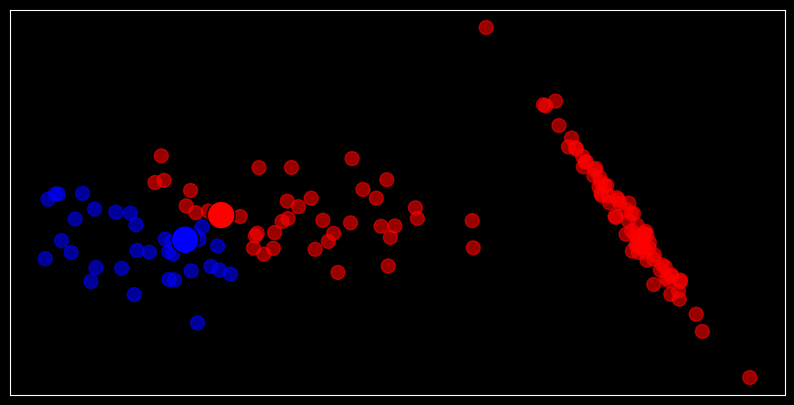

In [19]:
centroids = init_centroids(X, n_clusters, random_state=32)

cluster_label, distances=predict(X, n_clusters, centroids)
centroids_label = [0,1]

plot_cluster(X,centroids,
             cluster_label, centroids_label,)

Now let's select new centroids as the midpoint of the cluster.

To do this, we'll need to select each cluster individually.

In [20]:
old_centroids = np.copy(centroids)

for k in range(n_clusters): # search all clusters
    c_idxs = np.flatnonzero(cluster_label==k) #get the indexes of the texts of the points that belong to cluster k
    centroids[k] = X[c_idxs].mean(axis = 0) # count the average representative for the cluster

Visualize the result

Show both old and new centroids

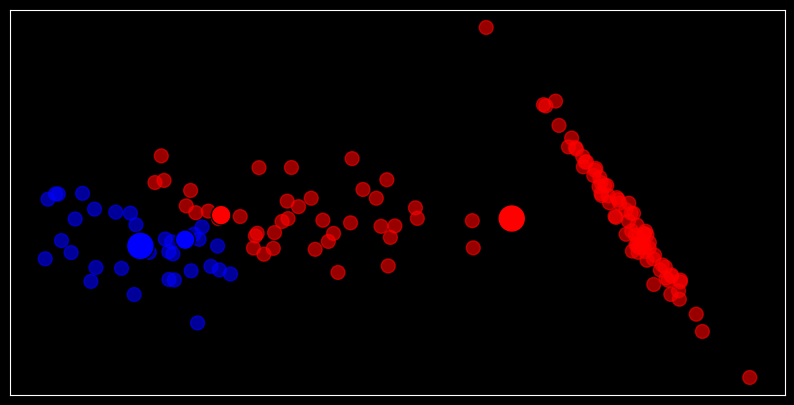

In [21]:
plot_cluster(X,centroids,
             cluster_label, centroids_label,
             old_centroids, centroids_label)

Let us calculate the relative distance between old and new centroids. If the distance between the updated centroids is relatively small, i.e. the centroids stop changing position, we will consider the clustering to be complete.

In [22]:
def delta_centroids(centroids,old_centroids, metric = 'euclidean', p = 2):
    """Estimation of changes in the position of cluster centers
    Input variables:
    ===========
    centroids: current cluster centers
    old_centroids: previous cluster centers
    old_centroids_label: labels for previous cluster centers
    metric: type of distance metric
    p: degree for the Minkowski Metric
    """
    # use the distance function to estimate the change in displacements of cluster centers
    return (distance(centroids,old_centroids, metric, p)/distance(old_centroids, np.mean(old_centroids), metric, p)).mean()

delta_centroids(centroids,old_centroids)

0.5594873059043128

Let's try to create iterative clustering procedures. At the end of the procedure output the resulting iteration number and the distance between clusters

In [23]:
def fit(X, n_clusters, centroids, max_iter=10, tol=0.01, metric = 'euclidean', p = 2):
    """Training k-means clustering.
    Input variables:
    ===========
    X: signs
    n_clusters: expected number of clusters
    centroids: current centers of clusters
    max_iter: maximum number of iterations of the K-means algorithm
    tol: distance change threshold
    metric: type of distance metric
    p: degree for the Minkowski Metric
    """
    dcentr = np.inf # let the difference between position changes be some large number first

    for i in range(max_iter): # make up to max_iter iterations of the algorithm

        old_centroids = np.copy(centroids) # current centers become old centers
        cluster_label,_=predict(X, n_clusters, centroids, metric, p) # predict cluster labels

        # count new cluster centers as cluster averages
        for k in range(n_clusters):
            c_idxs = np.flatnonzero(cluster_label==k)
            centroids[k] = X[c_idxs].mean(axis = 0)
        # estimate the relative change in centroids
        dcentr = delta_centroids(centroids,old_centroids, metric, p)
        # if the change is less than the threshold - finish earlier
        if dcentr<=tol:
            break

    print('We have stopped at iteration:', i, 'relative change in centroids: ',dcentr)

    return cluster_label # return final cluster labels


check and visualize the results.

In [24]:
cluster_label = fit(X, n_clusters, centroids, max_iter=100, tol=0.001)

We have stopped at iteration: 5 relative change in centroids:  0.0


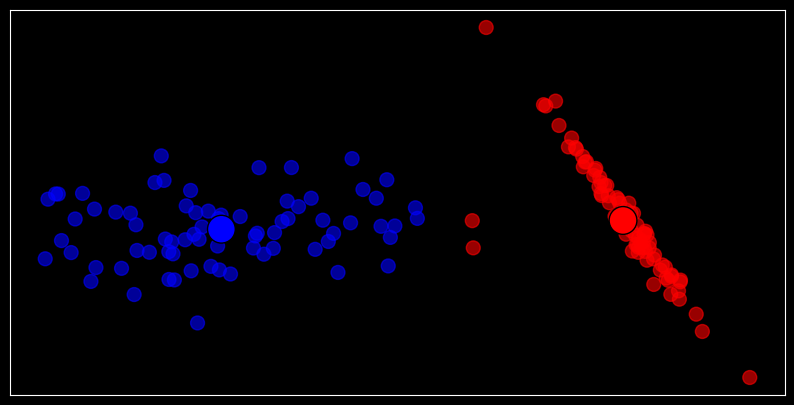

In [25]:

plot_cluster(X,centroids,
             cluster_label, centroids_label,)

seems plausible

As usual, we'll combine all our work into one class.

In [31]:
class KMeans():
    def __init__(self,n_clusters = 2, centroids = None,
                 max_iter=10, tol=0.01,
                 metric = 'euclidean', p = 2,
                 random_state = None):
        self.n_clusters = n_clusters
        self.centroids  = centroids
        self.max_iter   = max_iter
        self.tol        = tol
        self.iters      = None
        self.inertia = None
        self.metric = metric
        self.p  = p
        self.random_state  = random_state
    #-------------------------------------
    def distance(self,X1, X2):
        # distance
        if self.metric == 'euclidean':
            dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
        if self.metric == 'cityblock':
            dist = np.sum(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Chebyshev':
            dist = np.max(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Minkowski':
            dist = np.power(np.sum(np.power(np.abs(X1 - X2),self.p).T,axis=0),1/self.p)
        return dist
    #-------------------------------------
    def init_centroids(self, X):
        # Initialization of the first cluster centers
        if self.random_state: rng = np.random.seed(self.random_state)
        c_idxs = np.random.randint(0, X.shape[0], size = self.n_clusters)
        return X[c_idxs,:]
    #-------------------------------------
    def predict(self, X):
        # distance-based estimation of points belonging to a cluster
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i,centr in enumerate(self.centroids):
            distances[:,i] = self.distance(centr,X)
        self.inertia = np.sum(np.power(np.min(distances,axis = 1),2))
        return np.argmin(distances,axis = 1)
    #-------------------------------------
    def transform(self,X):
        # prediction
        return self.predict(X)
    #-------------------------------------
    def delta_centroids(self,old_centroids):
        # value of relative change in the centers of clusters
        return (
                self.distance(self.centroids,old_centroids)/
                self.distance(old_centroids, np.mean(old_centroids))
               ).mean()
    #-------------------------------------
    def fit(self, X):
        # training - several iterations of the k-means algorithm
        if self.centroids is None:
            self.centroids = self.init_centroids(X)

        d_centrs = np.inf

        for i in range(self.max_iter):

            old_centroids = np.copy(self.centroids)

            cluster_label = self.predict(X)

            for k in range(self.n_clusters):

                c_idxs = np.flatnonzero(cluster_label==k)

                self.centroids[k] = X[c_idxs].mean(axis = 0)

            d_centrs = self.delta_centroids(old_centroids)

            self.iters = i
            if d_centrs<=self.tol:
                break
        return self
    #-------------------------------------
    def fit_transform(self, X):
        # and train and give out cluster labels immediately
        return self.fit(X).predict(X)



Let's test our obtained class

To do this, we will try to use the elbow method to estimate the optimal number of clusters

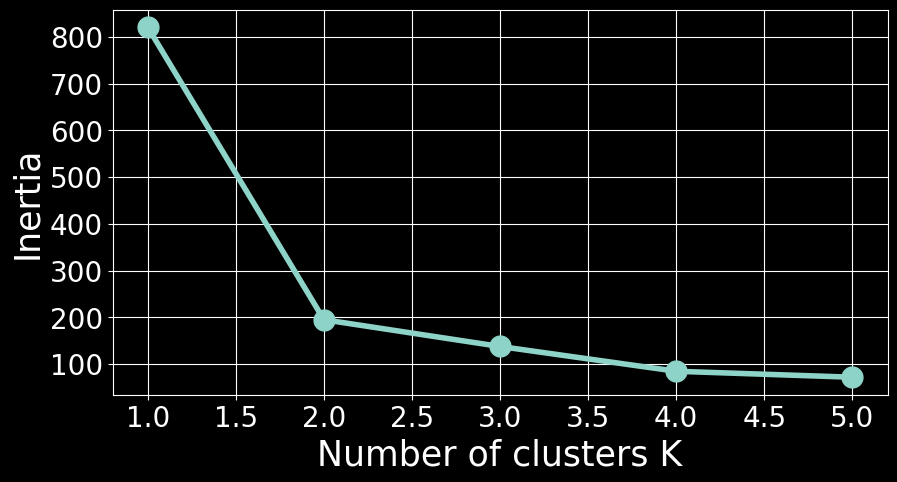

In [32]:
sse = [] # here we will store inertias for specific k's
list_k = list(range(1, 6))
for k in list_k: # test different k's in the range from 1 to 5
    km = KMeans(n_clusters=k)# create a clustering object with a given k
    km.fit(X) # train
    sse.append(km.inertia) # fix the current inertia

# visualize the elbow method. the following is a commonly used visualization
plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Number of clusters K', fontsize = 25)
plt.ylabel('Inertia', fontsize = 25)

plt.grid();
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

Let's see for 2 clusters (since 2 is more like an elbow)

According to a slightly modified standard scheme

* Create a model-object

* Train and extract cluster labels via `.fit_transform()`

* Visualize

We have stopped at iteration:: 3


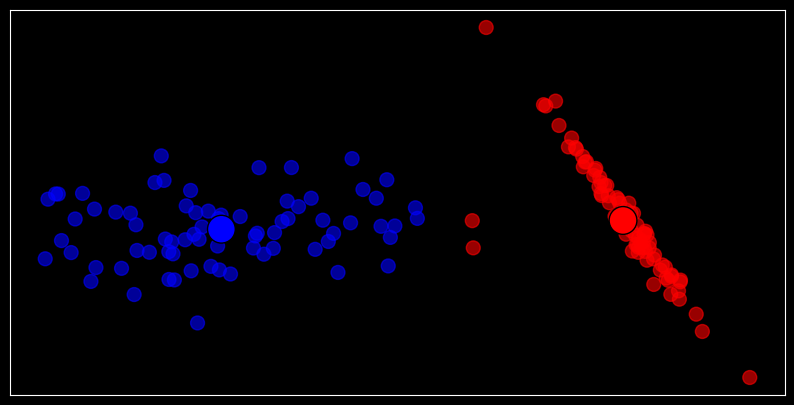

In [33]:
kmeans = KMeans(n_clusters=2,max_iter=100, tol=0.01, random_state= 42) # create object
c_labels = kmeans.fit_transform(X) # train and immediately stack cluster labels

print('We have stopped at iteration::',kmeans.iters)

# visualize
plot_cluster(X,kmeans.centroids,
             c_labels, np.unique(c_labels),)

Let's see for 4 clusters (to visually realize that “something is wrong”)

The steps we are already used to

* Create a model-object

* Train and extract cluster labels via `.fit_transform()`

* Visualize

We have settled on an iteration:: 2


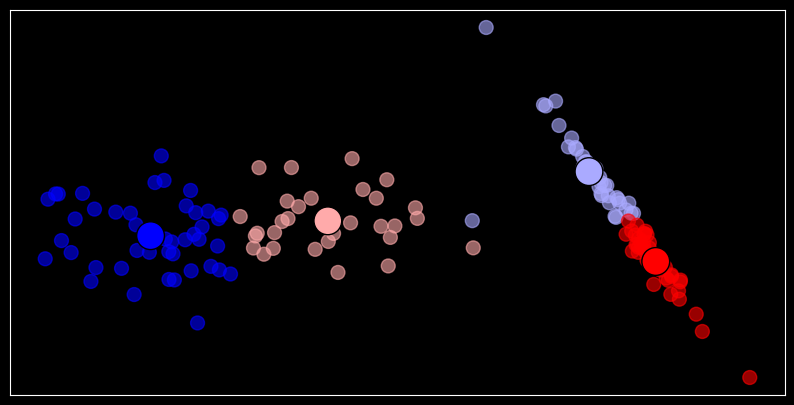

In [29]:
kmeans   = KMeans(n_clusters=4,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X)

print('We have settled on an iteration::',kmeans.iters)


plot_cluster(X,kmeans.centroids,
             c_labels, np.unique(c_labels),)




Before calculating the metrics, we need to understand how the cluster labels are distributed

The function from the pandas crosstab library is suitable for this purpose.

Set the correct cluster labels (if we have them, otherwise we can use categorical variables to estimate the relationship of cluster numbers to them) and the resulting cluster labels.


In [30]:
pd.crosstab(y,c_labels, rownames=['Labels'], colnames = ['Predictions'])

Predictions,0,1,2,3
Labels,,,,
0,43,1,31,0
1,0,34,0,41


From this table, we can see that the 0th and 2nd cluster is associated with the 0th label

And the 1st and 3rd cluster are associated with the 1st label

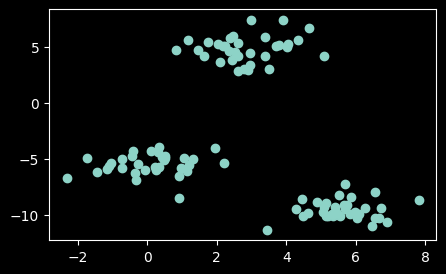

In [35]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, random_state=10)

plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1]);

We have stopped at iteration:: 2


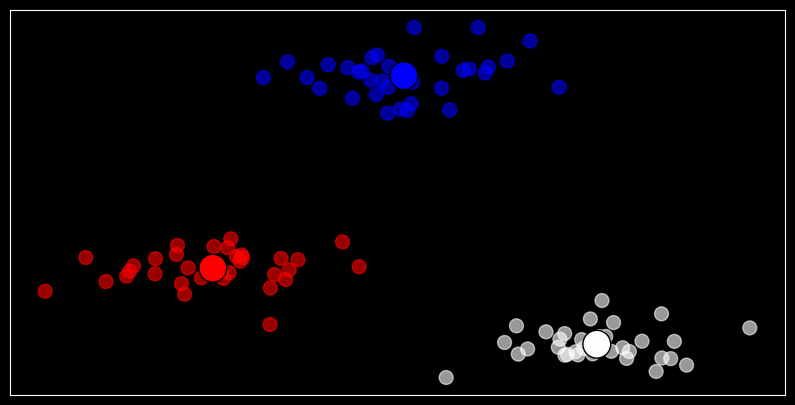

In [36]:
kmeans = KMeans(n_clusters=3,max_iter=100, tol=0.01, random_state= 42) # create object
c_labels = kmeans.fit_transform(X) # train and immediately stack cluster labels

print('We have stopped at iteration::',kmeans.iters)

# visualize
plot_cluster(X,kmeans.centroids,
             c_labels, np.unique(c_labels),)